In [1]:
%matplotlib notebook
#import keras
import tracker3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
frame = pd.read_csv("datasets/standard_curves100MeV.csv")
train, target = tracker3d.loader.var_dataload(frame, nev=10, tpe=9, ts=9, npe=0)

In [15]:
tracker3d.utils.display_side_by_side(train[2], target[2])

Input shape:  (81, 3)
Output shape: (81, 10)


,phi,layer,z
0,-3.133691,6.0,-10.393181
1,-3.069619,7.0,-12.125378
2,-2.985556,8.0,-13.857575
3,-2.879443,9.0,-15.589772
4,-2.649297,1.0,-0.401837
5,-2.635273,2.0,-0.803673
6,-2.606435,3.0,-1.205510
7,-2.581325,4.0,-1.607347
8,-2.554049,5.0,-2.009183
9,-2.485793,6.0,-2.411020


<IPython.core.display.Javascript object>


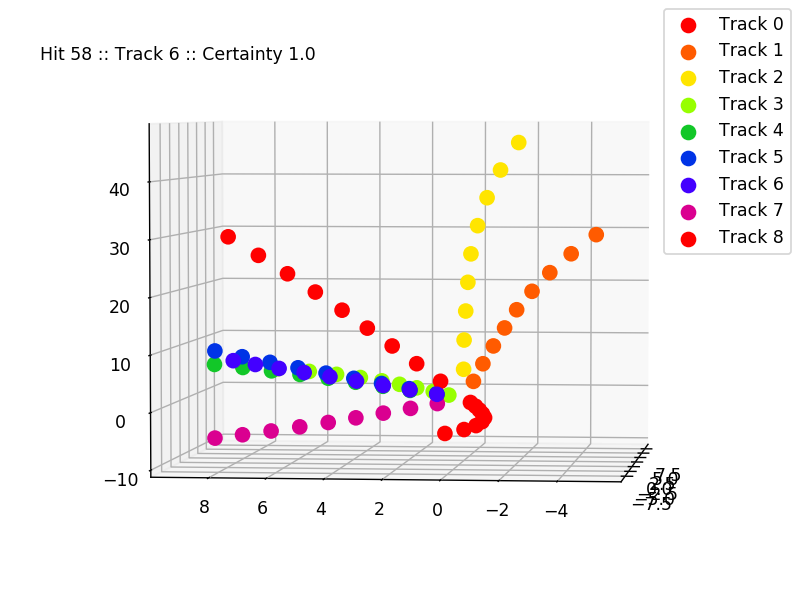

In [16]:
#event_number = np.random.randint(0, train.shape[0])
tracker3d.utils.plot3D(train[9], target[9])

In [ ]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [ ]:
input_shape = train[0].shape # Shape of an event.
output_shape = len(target[0][0]) # Number of tracks per event

batch_size = 32
epochs     = 256
valsplit   = 0.25
opt        = 'rmsprop' # optimizer
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=input_shape, dropout=.2, recurrent_dropout=.2))
model.add(Dense(output_shape, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#tracker.model.summary()

In [ ]:
modelpath = 'simple.h5'
hist = model.fit(train, target, epochs=epochs, batch_size=batch_size,
                         verbose=0, validation_split=valsplit,
                         callbacks=[keras.callbacks.ModelCheckpoint(filepath=modelpath, verbose=0)])

In [ ]:
predictions = model.predict(train, batch_size=batch_size)

In [ ]:
event_number = 4
tracker3d.utils.plot3D(train[event_number],
                       predictions[event_number],
                       target[event_number])
tracker3d.utils.display_side_by_side(train[event_number:], predictions[event_number:], 1)

In [ ]:
tracker3d.utils.print_scores(model, train, target, batch_size)
tracker3d.utils.graph_losses([("Categorical Cross Entropy", hist)])